In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

In [40]:
# Study data files
aquifer_metadata_path = "datasets/archive/Edwards_Aquifer_annual_recharge_2000_2020.csv"
Residential_Water_data_path = "datasets/archive/Austin_Water_-_Residential_Water_Consumption.csv"

# Read the water data and the study results
aquifer_metadata = pd.read_csv(aquifer_metadata_path)
Residential_Water_data = pd.read_csv(Residential_Water_data_path)

# Combine the data 

Residential_Water_data['Year'] = Residential_Water_data ['Year Month'].str.split ('/').str [0]

Residential_Water_data['Year'] = Residential_Water_data['Year'].astype(int)
Residential_Water_data['Year'] = pd.to_numeric(Residential_Water_data['Year'])

Residential_Water_data['Total Gallons'] = Residential_Water_data['Total Gallons'].astype(int)

# Combine the data into a single DataFrame

water_complete_complete = (pd.merge(aquifer_metadata, Residential_Water_data, how="inner", on=["Year"]))
water_complete_complete = water_complete_complete.drop(['Year Month'], axis=1)

# Display the data table for preview
water_complete_complete.head()

,Year,Basin_1,Basin_2,Basin_3,Basin_4,Basin_5,Basin_6,Basin_7,Basin_9,Total,Postal Code,Customer Class,Total Gallons
0,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Irrigation - Multi-Family,11000
1,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Multi-Family,23000
2,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Residential,19840800
3,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Multi-Family,2477000
4,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78652,Irrigation - Residential,38500


In [41]:
water_complete_complete.dtypes

Year                int64
Basin_1           float64
Basin_2           float64
Basin_3           float64
Basin_4           float64
Basin_5           float64
Basin_6           float64
Basin_7           float64
Basin_9           float64
Total             float64
Postal Code         int64
Customer Class     object
Total Gallons       int32
dtype: object

In [47]:
summary_df2 = water_complete_complete.groupby('Customer Class')['Total Gallons'].agg(['mean', 'median', 'var', 'std','sem'])
summary_df2

,mean,median,var,std,sem
Customer Class,,,,,
Irrigation - Multi-Family,1.853053e+06,997750.0,5.264581e+12,2.294467e+06,36415.531466
Irrigation - Residential,9.377354e+04,22950.0,5.869516e+10,2.422708e+05,3960.493009
Multi-Family,1.694487e+07,13057200.0,2.870086e+14,1.694133e+07,255168.252711
Residential,2.735767e+07,20781150.0,5.720986e+14,2.391858e+07,348888.380039


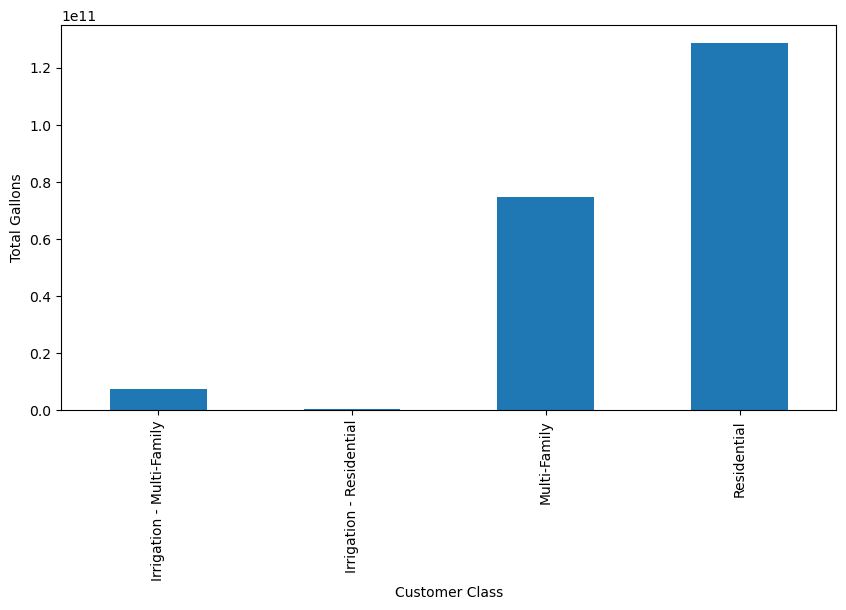

In [50]:
Custumer_class = water_complete_complete.groupby('Customer Class')['Total Gallons'].sum()

# Create a bar plot using the  series
Custumer_class.plot(kind='bar', figsize=(10,5))

# Set the title and axis labels
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons')

# Display the plot
plt.show()


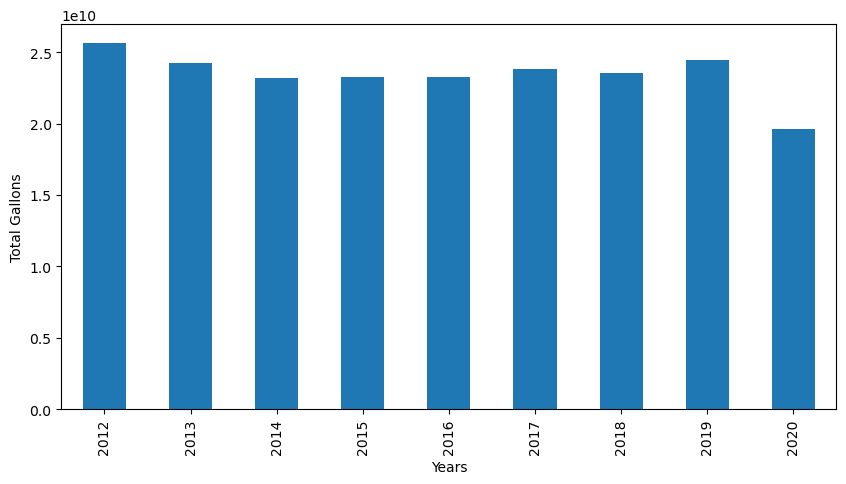

In [58]:
Custumer_class = water_complete_complete.groupby('Year')['Total Gallons'].sum()

# Create a bar plot using the  series
Custumer_class.plot(kind='bar', figsize=(10,5))

# Set the title and axis labels
plt.xlabel('Years')
plt.ylabel('Total Gallons')

# Display the plot
plt.show()